In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('./Twitter_sentiment_data_vidhya/train_E6oV3lV.csv')
df.head()
df.tail()
# df.shape
# df.info

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


# Preprocessing the dataset

In [46]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [47]:
df.head()
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [48]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [49]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [50]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [51]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
# tokenized_tweet[0]

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [52]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()
# tokenized_tweet[0]

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [53]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()
# df[0]

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [54]:
# !pip install wordcloud

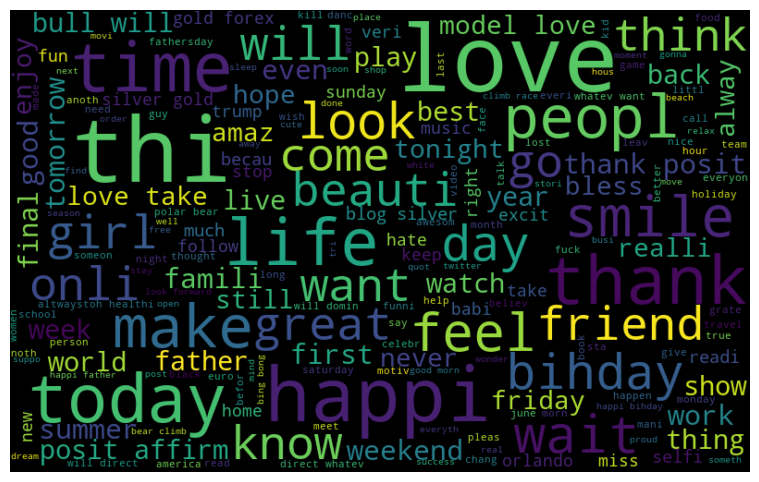

In [55]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
# print(all_words)

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

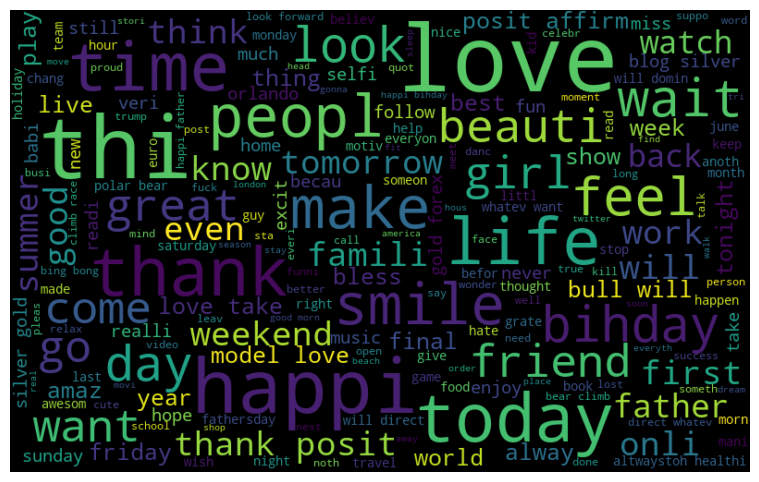

In [56]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

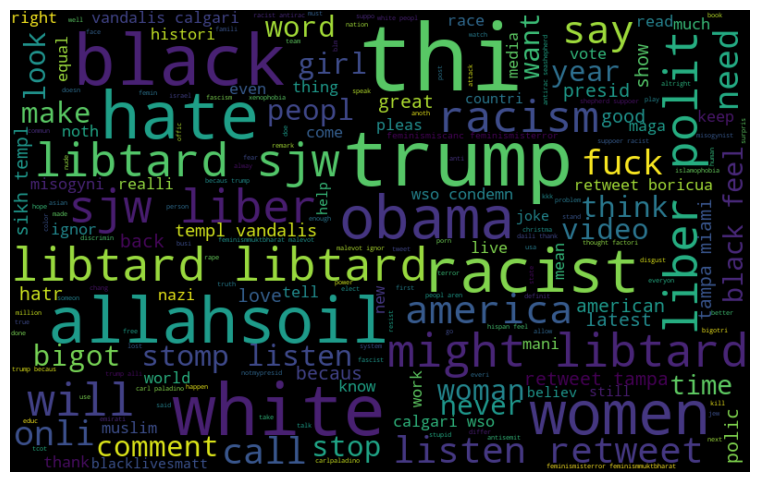

In [57]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [59]:
# extract hashtags from positive tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from negative tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [60]:
# ht_positive
# ht_negative

In [61]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [62]:
# ht_positive
# ht_negative

In [63]:
# For positive
freq = nltk.FreqDist(ht_positive)
d1 = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d1.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


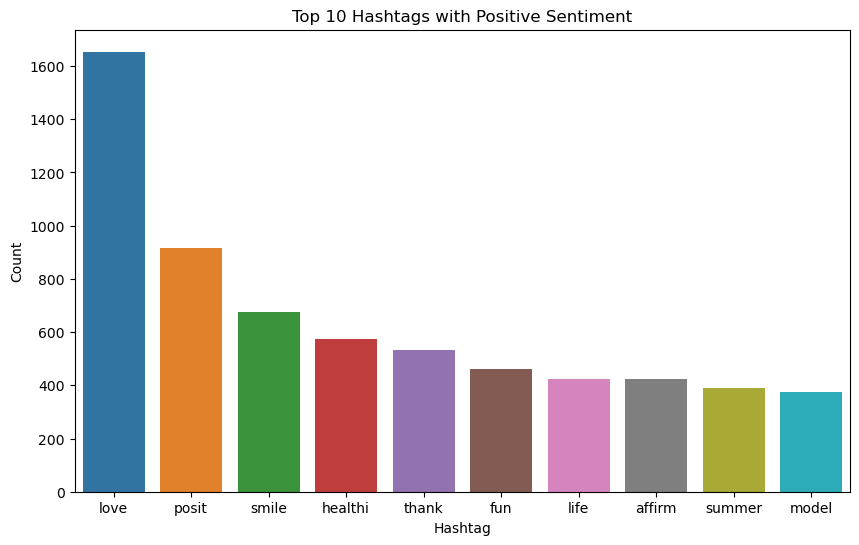

In [64]:
# select top 10 hashtags
d1 = d1.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,6))
sns.barplot(data=d1, x='Hashtag', y='Count').set(title='Top 10 Hashtags with Positive Sentiment')
plt.show()

In [65]:
# For negative
freq = nltk.FreqDist(ht_negative)
d2 = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d2.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


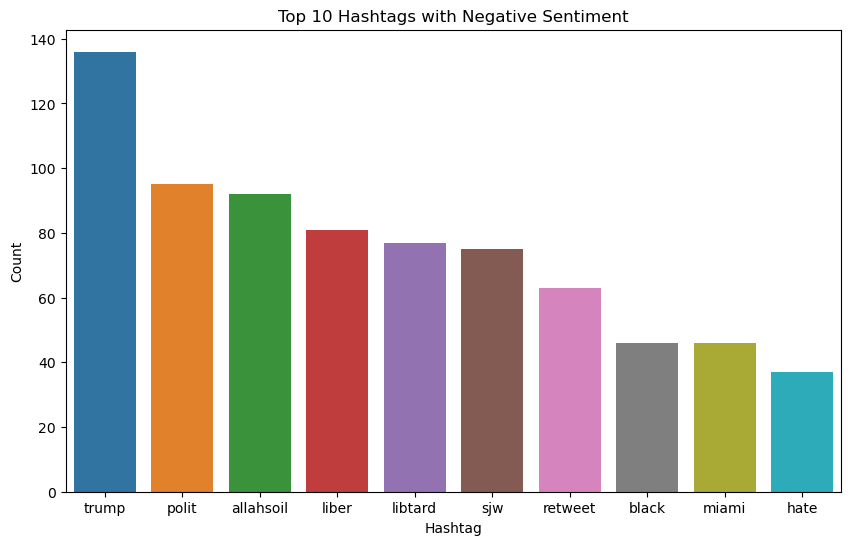

In [66]:
# select top 10 hashtags
d2 = d2.nlargest(columns='Count', n=10)
plt.figure(figsize=(10,6))
sns.barplot(data=d2, x='Hashtag', y='Count').set(title='Top 10 Hashtags with Negative Sentiment')
plt.show()

# Input Split

In [67]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [68]:
# bow[0].toarray()

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [70]:
# print(x_train)
# print(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23971, 1000)
(23971,)
(7991, 1000)
(7991,)


In [71]:
df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn


# Model Training

# 1. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [73]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [74]:
# testing
pred = model.predict(x_test)

print("Accuracy =",accuracy_score(y_test, pred))
print("Precision =",precision_score(y_test, pred))
print("Recall =",recall_score(y_test, pred))
print("F1-score =",f1_score(y_test, pred))

# from sklearn.metrics import classification_report
# print(classification_report(y_test, pred))

Accuracy = 0.9469403078463271
Precision = 0.7368421052631579
Recall = 0.3756708407871199
F1-score = 0.49763033175355453


Confusion matrix, without normalization
[[7357   75]
 [ 349  210]]


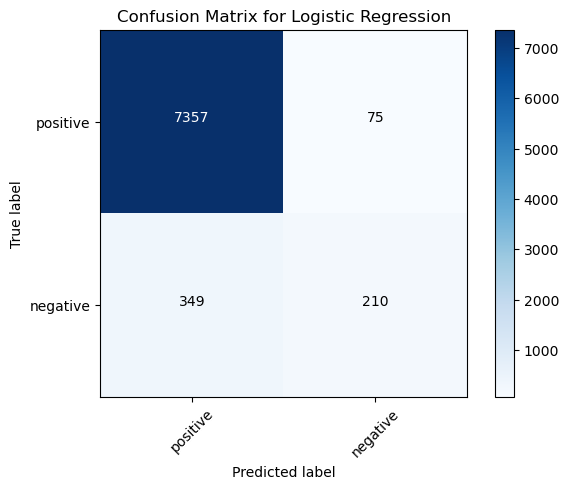

In [75]:
cnf_matrix=metrics.confusion_matrix(y_test, pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion Matrix for Logistic Regression')

plt.show()

In [76]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

print("Accuracy =",accuracy_score(y_test, pred))
print("Precision =",precision_score(y_test, pred))
print("Recall =",recall_score(y_test, pred))
print("F1-score =",f1_score(y_test, pred))

Accuracy = 0.9433112251282693
Precision = 0.6157205240174672
Recall = 0.5044722719141324
F1-score = 0.5545722713864307


In [77]:
pred_prob[0][1] >= 0.3

False

# 2. SVM

## Confusion Matrix Plot

In [78]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy = 94.65648854961832
Precision = 71.71052631578947
Recall = 38.998211091234346
F1-score = 50.52143684820394
Confusion matrix, without normalization
[[7346   86]
 [ 341  218]]
Normalized confusion matrix
[[0.99 0.01]
 [0.61 0.39]]


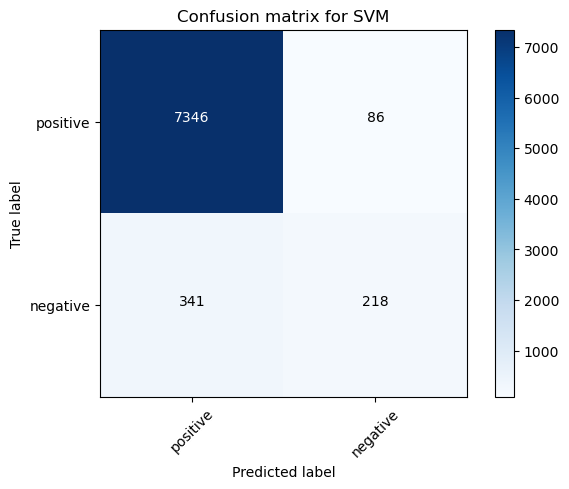

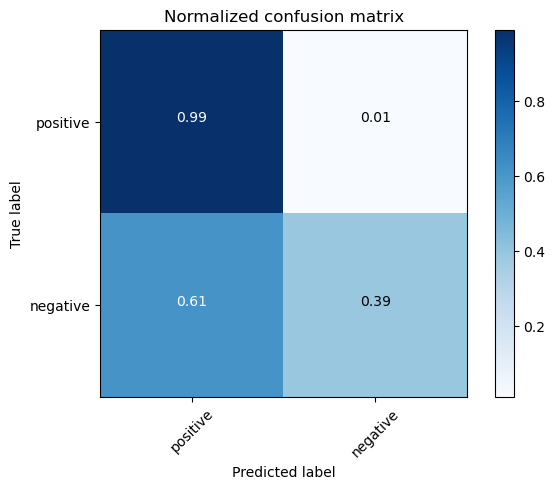

In [79]:
from sklearn.svm import LinearSVC
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC()
clf.fit(x_train,y_train)
# clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)
print("Accuracy =",metrics.accuracy_score(y_test, pred)*100)
print("Precision =",metrics.precision_score(y_test, pred)*100)
print("Recall =",metrics.recall_score(y_test, pred)*100)
print("F1-score =",metrics.f1_score(y_test, pred)*100)

# metrics.accuracy_score(y_test, pred)

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
#                       title='Confusion matrix, without normalization')
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix for SVM')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Naive Bayes

In [80]:
from sklearn.naive_bayes import *
from sklearn import metrics

In [81]:
clf=BernoulliNB()
clf.fit(x_train,y_train)
# clf.fit(x_test,y_test)

pred=clf.predict(x_test)

print("Accuracy =",metrics.accuracy_score(y_test, pred))
print("Precision =",metrics.precision_score(y_test, pred))
print("Recall =",metrics.recall_score(y_test, pred))
print("F1-score =",metrics.f1_score(y_test, pred))

# metrics.classification_report(y_test, pred)

Accuracy = 0.9371793267425854
Precision = 0.5540796963946869
Recall = 0.5223613595706619
F1-score = 0.5377532228360957


Confusion matrix, without normalization
[[7197  235]
 [ 267  292]]


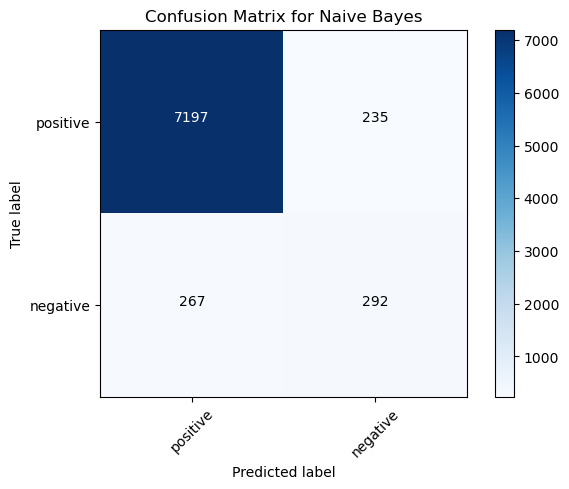

In [82]:
cnf_matrix=metrics.confusion_matrix(y_test, pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion Matrix for Naive Bayes')

plt.show()

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
classifier_tree=DecisionTreeClassifier()
classifier_tree.fit(x_train, y_train)
pred=classifier_tree.predict(x_test)
metrics.accuracy_score(y_test,pred)

# model.fit(x_train,y_train)
# model.score(x_test,y_test)

0.924665248404455

In [85]:
print("Accuracy =",accuracy_score(y_test, pred))
print("Precision =",precision_score(y_test, pred))
print("Recall =",recall_score(y_test, pred))
print("F1-score =",f1_score(y_test, pred))

Accuracy = 0.924665248404455
Precision = 0.4651539708265802
Recall = 0.5134168157423972
F1-score = 0.4880952380952381


Confusion matrix, without normalization
[[7102  330]
 [ 272  287]]


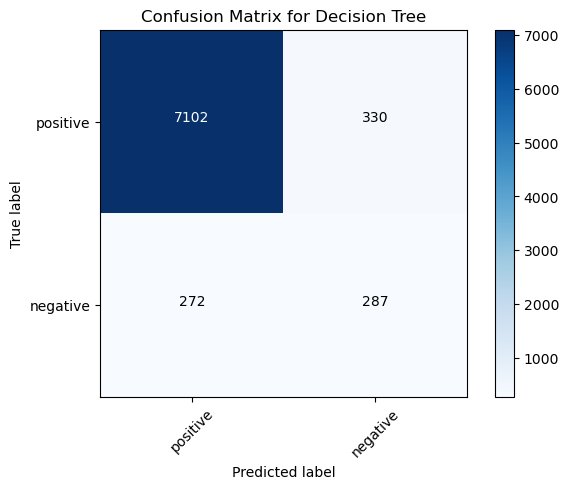

In [86]:
cnf_matrix=metrics.confusion_matrix(y_test, pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion Matrix for Decision Tree')

plt.show()